In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import datetime
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Makaa\Desktop\ML ZoomCamp\Car Price Prediction\data.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
object_columns = list(df.dtypes[df.dtypes=='object'].index)
object_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
df.make.str.lower().str.replace(' ','_').unique()

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

In [9]:
for col in object_columns :
    df[col]=df[col].str.lower().str.replace(' ','_')
     


In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
for col in df.columns :
    print(col)
    print('Number Of unique values is : ',df[col].nunique())
    print('Sample Of unique values : ',df[col].unique()[:5])
    print('################################')
    print()

make
Number Of unique values is :  48
Sample Of unique values :  ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
################################

model
Number Of unique values is :  914
Sample Of unique values :  ['1_series_m' '1_series' '100' '124_spider' '190-class']
################################

year
Number Of unique values is :  28
Sample Of unique values :  [2011 2012 2013 1992 1993]
################################

engine_fuel_type
Number Of unique values is :  10
Sample Of unique values :  ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
################################

engine_hp
Number Of unique values is :  356
Sample Of unique values :  [335. 300. 230. 320. 172.]
################################

engine_cylinders
Number Of unique values is :  9
Sample Of unique values :  [ 6.  4.  5.  8. 12.]
################################

transmission_type
Number Of unique values is :  5
Sample Of unique value

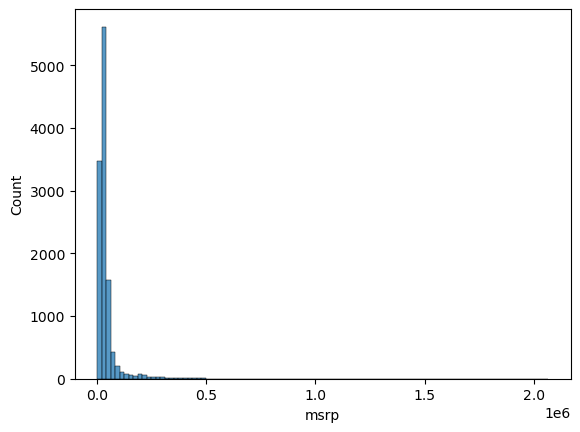

In [13]:
sns.histplot(df.msrp,bins=100)
plt.show()

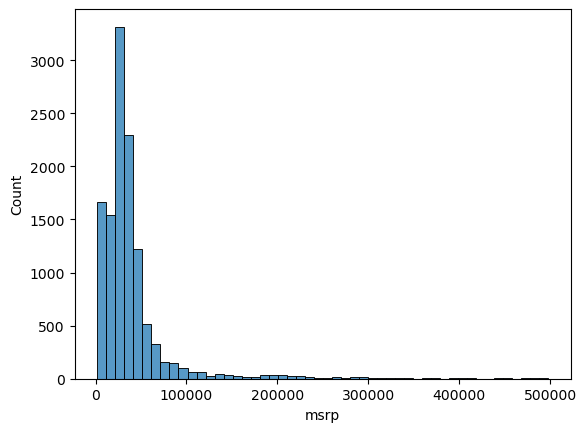

In [14]:
sns.histplot(df.msrp[df.msrp<500000],bins=50)
plt.show()

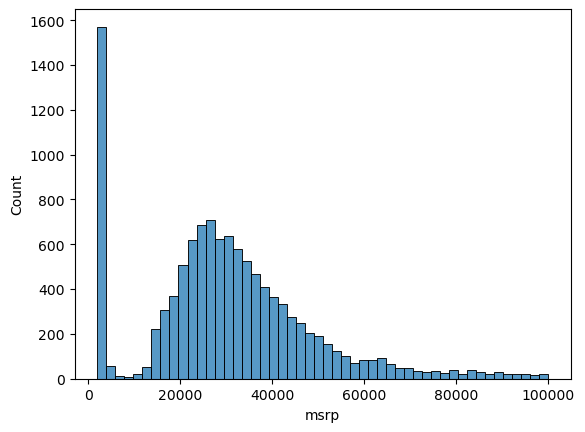

In [15]:
sns.histplot(df.msrp[df.msrp<100000],bins=50)
plt.show()

In [16]:
df.log_price=np.log1p(df.msrp)
df.log_price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

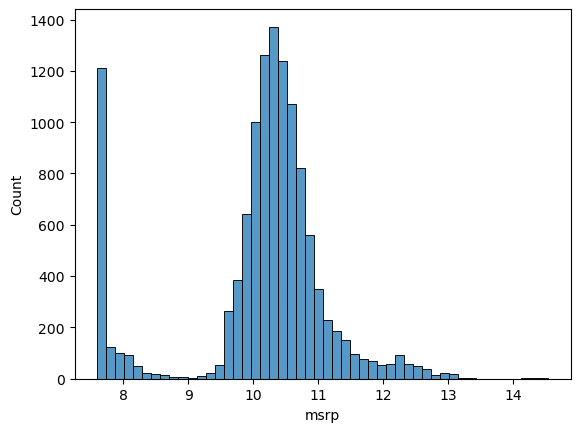

In [17]:
sns.histplot(df.log_price,bins=50)
plt.show()

In [18]:
np.log1p([100000,500000])

array([11.51293546, 13.12236538])

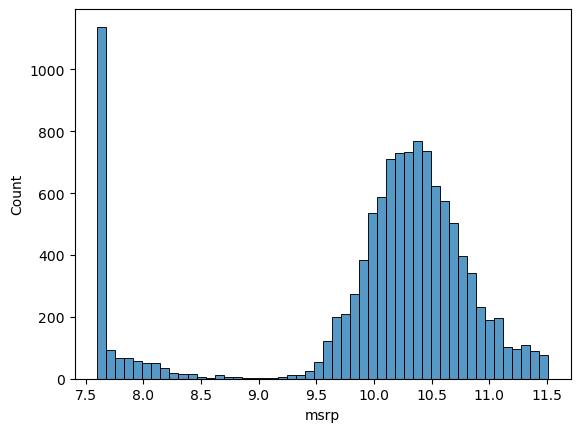

In [19]:
sns.histplot(df.log_price[df.log_price<11.51293546],bins=50)
plt.show()

In [20]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In some projects we treat the null values at this stages but in our project for learning we will treat it later 

In [21]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# Splitting the data 

In [22]:
n=len(df) 

n_test =int(n*0.21)
n_val = int(n*0.21 )
n_train=n -( n_test + n_val)

n,n_train,n_test,n_val,n_train+n_test+n_val

(11914, 6912, 2501, 2501, 11914)

In [23]:
np.random.seed(42)

In [24]:
idx=np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [25]:
np.random.shuffle(idx)
idx

array([3995, 7474, 7300, ..., 5390,  860, 7270])

In [26]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]
len(df_test),len(df_train),len(df_val)

(2501, 6912, 2501)

In [27]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3148,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170
747,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000


In [28]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1013,porsche,968,1995,regular_unleaded,236.0,4.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,24,15,1715,5576
1929,volkswagen,beetle,2015,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,25,873,26985
10685,ford,transit_connect,2017,flex-fuel_(unleaded/e85),169.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,cargo_minivan,27,20,5657,22900
5251,hyundai,genesis_coupe,2015,premium_unleaded_(recommended),348.0,6.0,automatic,rear_wheel_drive,2.0,high-performance,midsize,coupe,25,16,1439,34600
2179,chevrolet,camaro,2015,premium_unleaded_(required),505.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",midsize,coupe,19,13,1385,72305


In [29]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
5080,infiniti,g_convertible,2013,premium_unleaded_(recommended),325.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,25,17,190,47900
4244,suzuki,esteem,2002,regular_unleaded,122.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,30,23,481,14299
7319,kia,optima,2014,regular_unleaded,199.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,sedan,39,35,1720,31995
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
1601,toyota,avalon,2016,regular_unleaded,268.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,31,21,2031,35850


In [30]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170
4,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000


In [31]:
y_train =np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

y_train

array([10.29876764, 10.32535081, 10.53611479, ...,  9.91051282,
       11.03651737, 10.43443928])

In [32]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']
df_test.head()





,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,porsche,968,1995,regular_unleaded,236.0,4.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,24,15,1715
1,volkswagen,beetle,2015,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,25,873
2,ford,transit_connect,2017,flex-fuel_(unleaded/e85),169.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,cargo_minivan,27,20,5657
3,hyundai,genesis_coupe,2015,premium_unleaded_(recommended),348.0,6.0,automatic,rear_wheel_drive,2.0,high-performance,midsize,coupe,25,16,1439
4,chevrolet,camaro,2015,premium_unleaded_(required),505.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",midsize,coupe,19,13,1385


# Linear Regression Point

In [33]:
w0=6.458
w=[0.001,0.0051,0.01541,0.005481,0.0046781,0.055]
def linearRegressionPoint(xlist):
    n=len(xlist)
    pred = w0
    for x in range(n):
        
        pred= pred + w[x]*xlist[x]
        
    return pred

In [34]:
x_features = [303,8,4,25,16,210]
linearRegressionPoint(x_features)

18.625314600000003

In [35]:
np.exp(7.5814146000000004)

1961.401602546403

In [36]:
def dotLinearRegression(xlist):
    n=len(xlist)
    
    pred= 0.0 
    for i in range(n): 
        pred = pred + w[i]*xlist[i]
        
    return w0+pred    


In [37]:
dotLinearRegression(x_features)

18.625314600000003

In [38]:
wlist = [w0]+w

def LinearRegressionDot(wList,xList): 
    xlist= [1]+xList
    return np.dot(wList,xlist)

In [39]:
LinearRegressionDot(wlist,x_features)

18.625314600000003

In [40]:
x1=[1,303,8,4,25,16,210]
x2=[1,209,12,5,19,7,300]
x3=[1,248,7,7,21,19,315]

X=[x1,x2,x3]
X=np.array(X)
X

array([[  1, 303,   8,   4,  25,  16, 210],
       [  1, 209,  12,   5,  19,   7, 300],
       [  1, 248,   7,   7,  21,  19, 315]])

In [41]:
def DotLR(x,w):
    return x.dot(w)

In [42]:
DotLR(X,wlist)

array([18.6253146, 23.4421357, 24.3785549])

In [43]:

X=[
    
    [303,8,4,25,16,210],
    [209,19,5,19,9,300],
    [248,7,7,21,19,315],
    [314,9,9,25,21,288],
    [288,11,3,25,18,290],
    [275,12,7,19,7,305]

]
X=np.array(X)
X

array([[303,   8,   4,  25,  16, 210],
       [209,  19,   5,  19,   9, 300],
       [248,   7,   7,  21,  19, 315],
       [314,   9,   9,  25,  21, 288],
       [288,  11,   3,  25,  18, 290],
       [275,  12,   7,  19,   7, 305]])

In [44]:
ones=np.ones(X.shape[0])


In [45]:
X=np.column_stack([ones,X])
X

array([[  1., 303.,   8.,   4.,  25.,  16., 210.],
       [  1., 209.,  19.,   5.,  19.,   9., 300.],
       [  1., 248.,   7.,   7.,  21.,  19., 315.],
       [  1., 314.,   9.,   9.,  25.,  21., 288.],
       [  1., 288.,  11.,   3.,  25.,  18., 290.],
       [  1., 275.,  12.,   7.,  19.,   7., 305.]])

In [46]:
y=[10000,11000,13500,9700,16000,10000]

In [47]:
XTX=X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)

W_ff=XTX_inv.dot(X.T).dot(y)


In [48]:
W_ff

array([ 1.75747681e+04,  4.28593159e+00, -7.38363266e+01, -1.18521233e+03,
       -1.15776672e+03,  6.62824821e+02,  4.19750452e+01])

In [49]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w_f=XTX_inv.dot(X.T).dot(y)
    
    return  w_f[0],w_f[1:]
    


In [50]:


Xx=[
    
    [303,8,4,25,16,210],
    [209,19,5,19,9,300],
    [248,7,7,21,19,315],
    [314,9,9,25,21,288],
    [288,11,3,25,18,290],
    [275,12,7,19,7,305]


]
Xx=np.array(Xx)

In [51]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [52]:
train_linear_regression(Xx,y)


(17574.76806640625,
 array([    4.28593159,   -73.8363266 , -1185.21232605, -1157.76672363,
          662.82482147,    41.9750452 ]))

# Train Base Model 

In [53]:
base_features = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']


In [54]:
df_base_train = df_train[base_features]

In [55]:
df_train[base_features].isnull().sum()

engine_hp           50
engine_cylinders    15
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [56]:
df_train[base_features] = df_train[base_features].fillna(0)

In [57]:
df_train[base_features].isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [58]:
df_base_train=df_train[base_features].values
df_base_train

array([[ 275.,    6.,   18.,   13.,  549.],
       [ 170.,    4.,   38.,   25.,  873.],
       [ 248.,    6.,   28.,   19., 2202.],
       ...,
       [ 157.,    4.,   28.,   21.,  586.],
       [ 343.,    6.,   26.,   18.,  190.],
       [ 261.,    6.,   21.,   15., 2009.]])

In [59]:
ww0,ww = train_linear_regression(df_base_train,y_train)

In [60]:
y_pred = ww0 + df_base_train.dot(ww)

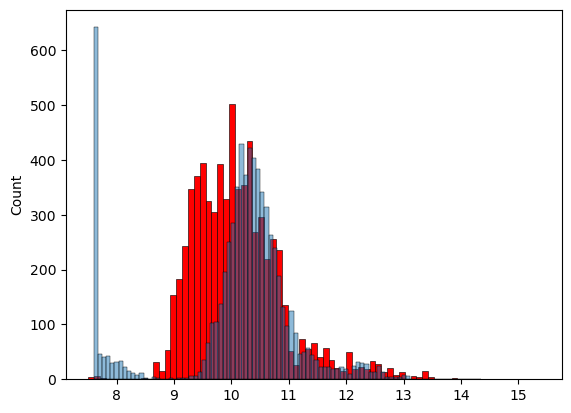

In [61]:
sns.histplot(y_pred,color='red',alpha = 1)
sns.histplot(y_train , alpha = .5)
plt.show()

In [62]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202
3,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385
4,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,gmc,sierra_1500hd,2006,regular_unleaded,300.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,16,13,549
6908,buick,rainier,2005,regular_unleaded,275.0,6.0,automatic,all_wheel_drive,4.0,NaN,midsize,4dr_suv,19,14,155
6909,mazda,5,2014,regular_unleaded,157.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,passenger_minivan,28,21,586
6910,infiniti,q60_convertible,2014,premium_unleaded_(required),343.0,6.0,automatic,rear_wheel_drive,2.0,"factory_tuner,luxury,performance",midsize,convertible,26,18,190


# RMSE

In [63]:
def rmse(y_p,y_t):
    sub= (y_p - y_t)**2 
    su = sub.mean()
    return np.sqrt(su)

In [64]:
rmse(y_pred,y_train)

0.7579795500294263

In [65]:
def prepare_df(df):
    df=df.copy()
    df = df[base_features] 
    df = df.fillna(0)
    return   df.values

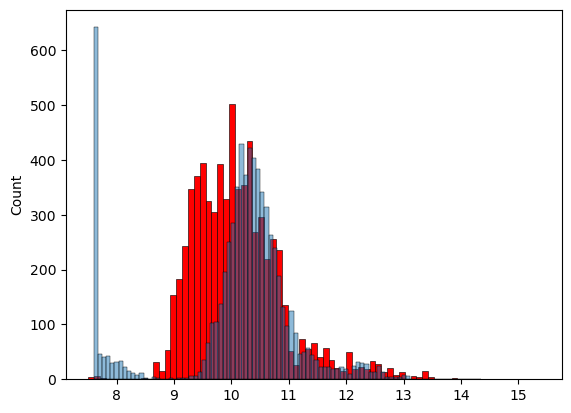

In [66]:
dff_train = prepare_df(df_train)
ww0,ww = train_linear_regression(dff_train,y_train)

y_pred = ww0 + df_base_train.dot(ww)
sns.histplot(y_pred,color='red',alpha = 1)
sns.histplot(y_train , alpha = .5)
plt.show()

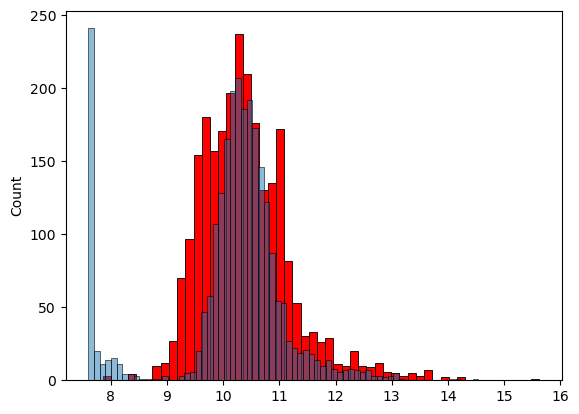

In [67]:
dff_val = prepare_df(df_val)
wv0,wv = train_linear_regression(dff_val,y_val)

y_val_pred = ww0 + dff_val.dot(wv)

sns.histplot(y_val_pred,color='red',alpha = 1)
sns.histplot(y_val , alpha = .5)
plt.show()

# Feature Engineering 

add another column -more columns- in df to minmize the RMSE 

In [68]:
def prepare_df(df):
    df= df.copy()
    df['age'] = 2017 - df.year
    features = base_features
    features = features + ['age']
    df = df[features] 
    df = df.fillna(0)
    return   df.values

In [69]:
prepare_df(df_train)

array([[2.750e+02, 6.000e+00, 1.800e+01, 1.300e+01, 5.490e+02, 1.200e+01],
       [1.700e+02, 4.000e+00, 3.800e+01, 2.500e+01, 8.730e+02, 1.000e+00],
       [2.480e+02, 6.000e+00, 2.800e+01, 1.900e+01, 2.202e+03, 1.000e+00],
       ...,
       [1.570e+02, 4.000e+00, 2.800e+01, 2.100e+01, 5.860e+02, 3.000e+00],
       [3.430e+02, 6.000e+00, 2.600e+01, 1.800e+01, 1.900e+02, 3.000e+00],
       [2.610e+02, 6.000e+00, 2.100e+01, 1.500e+01, 2.009e+03, 2.000e+00]])

In [70]:
dff_train = prepare_df(df_train)
ww0,ww = train_linear_regression(dff_train,y_train)

y_pred = ww0 + dff_train.dot(ww)

rmse(y_pred,y_train)

0.5188945079963871

In [71]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202
3,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385
4,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,gmc,sierra_1500hd,2006,regular_unleaded,300.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,16,13,549
6908,buick,rainier,2005,regular_unleaded,275.0,6.0,automatic,all_wheel_drive,4.0,NaN,midsize,4dr_suv,19,14,155
6909,mazda,5,2014,regular_unleaded,157.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,passenger_minivan,28,21,586
6910,infiniti,q60_convertible,2014,premium_unleaded_(required),343.0,6.0,automatic,rear_wheel_drive,2.0,"factory_tuner,luxury,performance",midsize,convertible,26,18,190


In [72]:
def prepare_df(df):
    df= df.copy()
    df['age'] = 2017 - df.year
    features = base_features
    features = features + ['age']
    
    for n in [1,2,3]: 
        df['num_doors_%d' %n] = (df.number_of_doors == n).astype('int')
        features.append('num_doors_%d'%n)
    

    df = df[features] 
    df = df.fillna(0)
    return   df.values




In [73]:
dff_train = prepare_df(df_train)
ww0,ww = train_linear_regression(dff_train,y_train)

y_pred = ww0 + dff_train.dot(ww)

rmse(y_pred,y_train)

LinAlgError: Singular matrix

We will treat it...

In [74]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [75]:
# The dictionary category will contain for each of the categories 
# the top 5 most common ones
categories = {}
for c in categorical_variables: 
    categories[c]= list(df[c].value_counts().head().index)


In [76]:
 categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [77]:
def prepare_df(df):
    df= df.copy()
    df['age'] = 2017 - df.year
    features = base_features.copy()
    features.append('age')
    
    for n in [1,2,3]: 
        df['num_doors_%d' %n] = (df.number_of_doors == n).astype(int)
        features.append('num_doors_%d'%n)
        
        
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    
    for c, values in categories.items():
        for v in values:
        # Use the correct string formatting and column access method
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')  # Access the column using df[c]
            features.append('%s_%s' % (c, v))

        
        
    
    
    df = df[features] 
    df = df.fillna(0)
    return   df.values

In [78]:
dff_train = prepare_df(df_train)
ww0,ww = train_linear_regression(dff_train,y_train)

y_pred = ww0 + dff_train.dot(ww)

rmse(y_pred,y_train)

LinAlgError: Singular matrix

We will treat it in next step...

# Regularization 

Sometimes after splitting the dataset and after preparing the x the Singular matrix issue occurred, so we used "Regualrization " for treat it 

If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), it will not have an inverse matrix. But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, 
which decreases the model performance. To solve this issue, 
one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns.
The regularization value is a hyperparameter of the model. After applying regularization the model performance improved.


In [79]:



def train_linear_regression_reg(X,y,r=0.001):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    #Regularization 
    
    XTX=XTX +r * np.eye(XTX.shape[0])
    
    
    XTX_inv = np.linalg.inv(XTX)

    w_f=XTX_inv.dot(X.T).dot(y)
    
    return  w_f[0],w_f[1:]
    


In [80]:
dff_train = prepare_df(df_train)
ww0,ww = train_linear_regression_reg(dff_train,y_train)

y_pred = ww0 + dff_train.dot(ww)

rmse(y_pred,y_train)

0.4612510302804422

# Tunning the model & best Reg. Parameter 

In [81]:
for r in [10, 1,0.1, 0.01, 0.001, 0.0001, 0.00001]:
    dff_train = prepare_df(df_train)
    ww0,ww = train_linear_regression_reg(dff_train,y_train,r=r)

    y_pred = ww0 + dff_train.dot(ww)

    RMSE = rmse(y_pred,y_train)
    print('RMSE : ', RMSE,'& W0 =',ww0,'with r = ',r)

RMSE :  0.47641015454020424 & W0 = 4.832908791947339 with r =  10
RMSE :  0.46162223970649824 & W0 = 5.83252724640972 with r =  1
RMSE :  0.4612552363567899 & W0 = 5.993782980774669 with r =  0.1
RMSE :  0.4612510724709314 & W0 = 6.010965850581129 with r =  0.01
RMSE :  0.4612510302804422 & W0 = 6.012641141735874 with r =  0.001
RMSE :  0.461251029858001 & W0 = 6.016363884310433 with r =  0.0001
RMSE :  0.46125102985436167 & W0 = 7.718578069795976 with r =  1e-05


In [82]:
r=0.001
dff_train = prepare_df(df_train)
ww0,ww = train_linear_regression_reg(dff_train,y_train)

y_pred = ww0 + dff_train.dot(ww)

rmse(y_pred,y_train)

0.4612510302804422

# Using The Model 

In [83]:
X_train = prepare_df(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_df(df_val)
y_pred = w_0 + X_val.dot(w)

print('validation:', rmse(y_val, y_pred))

X_test = prepare_df(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.45303460516114225
test: 0.45384719824395053


In [84]:
car_df =pd.DataFrame([df_test.iloc[25]])
car_df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
25,toyota,sequoia,2015,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,4dr_suv,17,13,2031


In [85]:
x_car = prepare_df(car_df)
# Here we don't use w formula to protect the model from overvitting and we use the trained weights 
car_pred = ww0 + x_car.dot(ww)
car_pred[0]


10.914472386621895

In [86]:
print('Prediction Price Is :',np.expm1(car_pred[0]))

Prediction Price Is : 54965.12616792667


In [87]:
print('The Actual Price Is :',np.expm1(y_test[25]))

The Actual Price Is : 64320.00000000002


# Done...